In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cultivar_mix_data_20 = pd.read_csv(r"/home/simmondsh/Desktop/git_repos/cultivar_mixture_modelling/cultivar_mix_disease_scoring_2020.csv", header = 0)
cultivar_mix_data_20[["Trat","Cultivar","Plot"]].astype(str)

cultivar_mix_data_20 = cultivar_mix_data_20[["Plot","Trat", "Cultivar","Z2","Z3"]]
cultivar_mix_data_20["Trat"].replace({"C1":100, "A1C3":75, "A1C1":50, "A3C1":25, "A1":0}, inplace = True)
cultivar_mix_data_20

,Plot,Trat,Cultivar,Z2,Z3
0,A1,100,C,3.0,10.0
1,A1,100,C,5.0,10.0
2,A1,100,C,7.0,20.0
3,A1,100,C,0.0,15.0
4,A1,100,C,3.0,15.0
...,...,...,...,...,...
355,E3,25,C,3.0,7.0
356,E3,25,A,7.0,20.0
357,E3,25,C,1.0,10.0
358,E3,25,A,5.0,25.0


In [3]:
weights_cellule = [1,0.75,0.5,0.25]
conditions_cellule = [
    (cultivar_mix_data_20["Trat"] == 100) & (cultivar_mix_data_20["Cultivar"] == "C"),
    (cultivar_mix_data_20["Trat"] == 75) & (cultivar_mix_data_20["Cultivar"] == "C"),
    (cultivar_mix_data_20["Trat"] == 50) & (cultivar_mix_data_20["Cultivar"] == "C"),
    (cultivar_mix_data_20["Trat"] == 25) & (cultivar_mix_data_20["Cultivar"] == "C"),
]
weights_apache = [1,0.25,0.5,0.75]
conditions_apache = [
    (cultivar_mix_data_20["Trat"] == 0) & (cultivar_mix_data_20["Cultivar"] == "A"),
    (cultivar_mix_data_20["Trat"] == 75) & (cultivar_mix_data_20["Cultivar"] == "A"),
    (cultivar_mix_data_20["Trat"] == 50) & (cultivar_mix_data_20["Cultivar"] == "A"),
    (cultivar_mix_data_20["Trat"] == 25) & (cultivar_mix_data_20["Cultivar"] == "A"),
]
cultivar_mix_data_20['w1'] = np.select(conditions_cellule, weights_cellule)
cultivar_mix_data_20['w2'] = np.select(conditions_apache, weights_apache)

In [4]:
cultivar_mix_data_20['w'] = cultivar_mix_data_20['w1']+ cultivar_mix_data_20['w2']
cultivar_mix_data_20_w = cultivar_mix_data_20.drop(["w1","w2"], axis=1)
cultivar_mix_data_20_w

,Plot,Trat,Cultivar,Z2,Z3,w
0,A1,100,C,3.0,10.0,1.00
1,A1,100,C,5.0,10.0,1.00
2,A1,100,C,7.0,20.0,1.00
3,A1,100,C,0.0,15.0,1.00
4,A1,100,C,3.0,15.0,1.00
...,...,...,...,...,...,...
355,E3,25,C,3.0,7.0,0.25
356,E3,25,A,7.0,20.0,0.75
357,E3,25,C,1.0,10.0,0.25
358,E3,25,A,5.0,25.0,0.75


In [5]:
cmd20_mean_plot = cultivar_mix_data_20_w.groupby(["Plot","Trat","Cultivar"]).mean().reset_index()
cmd20_mean_plot

,Plot,Trat,Cultivar,Z2,Z3,w
0,A1,100,C,2.866667,15.266667,1.00
1,A2,25,A,11.200000,22.461538,0.75
2,A2,25,C,1.666667,8.500000,0.25
3,A3,0,A,10.533333,24.428571,1.00
4,B1,50,A,7.733333,21.714286,0.50
5,B1,50,C,2.533333,11.666667,0.50
6,B2,75,A,8.857143,22.700000,0.25
7,B2,75,C,4.133333,11.250000,0.75
8,B3,100,C,4.866667,18.000000,1.00
9,C1,25,A,10.733333,14.769231,0.75


In [6]:
cmd20_mean_plot["pZ2wm"] = cmd20_mean_plot["Z2"]*cmd20_mean_plot["w"]
cmd20_mean_plot["pZ3wm"] = cmd20_mean_plot["Z3"]*cmd20_mean_plot["w"]
cmd20_mean_plot
# use this to plot individual points on the graph related to plots

,Plot,Trat,Cultivar,Z2,Z3,w,pZ2wm,pZ3wm
0,A1,100,C,2.866667,15.266667,1.00,2.866667,15.266667
1,A2,25,A,11.200000,22.461538,0.75,8.400000,16.846154
2,A2,25,C,1.666667,8.500000,0.25,0.416667,2.125000
3,A3,0,A,10.533333,24.428571,1.00,10.533333,24.428571
4,B1,50,A,7.733333,21.714286,0.50,3.866667,10.857143
5,B1,50,C,2.533333,11.666667,0.50,1.266667,5.833333
6,B2,75,A,8.857143,22.700000,0.25,2.214286,5.675000
7,B2,75,C,4.133333,11.250000,0.75,3.100000,8.437500
8,B3,100,C,4.866667,18.000000,1.00,4.866667,18.000000
9,C1,25,A,10.733333,14.769231,0.75,8.050000,11.076923


In [7]:
cmd20_mean_plot_apache = cmd20_mean_plot[cmd20_mean_plot['Cultivar'] == 'A']
cmd20_mean_plot_cellule = cmd20_mean_plot[cmd20_mean_plot['Cultivar'] == 'C']
cmd20_mean_plot_cellule

,Plot,Trat,Cultivar,Z2,Z3,w,pZ2wm,pZ3wm
0,A1,100,C,2.866667,15.266667,1.00,2.866667,15.266667
2,A2,25,C,1.666667,8.500000,0.25,0.416667,2.125000
5,B1,50,C,2.533333,11.666667,0.50,1.266667,5.833333
7,B2,75,C,4.133333,11.250000,0.75,3.100000,8.437500
8,B3,100,C,4.866667,18.000000,1.00,4.866667,18.000000
10,C1,25,C,1.800000,6.714286,0.25,0.450000,1.678571
13,C3,75,C,5.600000,15.733333,0.75,4.200000,11.800000
15,D2,100,C,3.733333,13.533333,1.00,3.733333,13.533333
17,D3,50,C,1.533333,6.333333,0.50,0.766667,3.166667
19,E1,75,C,2.466667,11.733333,0.75,1.850000,8.800000


In [8]:
#now need to produced arcoss all three plots for the averge line
cmd20_mean_cultivar = cultivar_mix_data_20_w.drop(['Plot'], axis = 1)
cmd20_mean_cultivar =  cmd20_mean_cultivar.groupby(["Trat","Cultivar"]).mean().reset_index()
cmd20_mean_cultivar

,Trat,Cultivar,Z2,Z3,w
0,0,A,8.933333,19.261905,1.00
1,25,A,9.733333,16.846154,0.75
2,25,C,1.511111,5.976744,0.25
3,50,A,7.000000,15.692308,0.50
4,50,C,1.955556,8.522727,0.50
5,75,A,9.545455,21.358974,0.25
6,75,C,4.066667,13.023810,0.75
7,100,C,3.822222,15.545455,1.00


In [9]:
cmd20_mean_cultivar['Z2wm'] = cmd20_mean_cultivar['Z2']*cmd20_mean_cultivar['w']
cmd20_mean_cultivar['Z3wm'] = cmd20_mean_cultivar['Z3']*cmd20_mean_cultivar['w']
cmd20_mean_cultivar_apache = cmd20_mean_cultivar[cmd20_mean_cultivar['Cultivar'] == 'A']
cmd20_mean_cultivar_cellule = cmd20_mean_cultivar[cmd20_mean_cultivar['Cultivar'] == 'C']
cmd20_mean_cultivar_cellule

,Trat,Cultivar,Z2,Z3,w,Z2wm,Z3wm
2,25,C,1.511111,5.976744,0.25,0.377778,1.494186
4,50,C,1.955556,8.522727,0.50,0.977778,4.261364
6,75,C,4.066667,13.023810,0.75,3.050000,9.767857
7,100,C,3.822222,15.545455,1.00,3.822222,15.545455


In [10]:
cmd20_mean_trat = cultivar_mix_data_20_w.drop(['Plot','Cultivar'], axis = 1)
cmd20_mean_trat['tZ2wm'] = cmd20_mean_trat['Z2']*cmd20_mean_trat['w']
cmd20_mean_trat['tZ3wm'] = cmd20_mean_trat['Z3']*cmd20_mean_trat['w']
cmd20_mean_trat = cmd20_mean_trat.groupby(['Trat']).mean().reset_index()
cmd20_mean_trat
#where as others you have grouped fist this time multiple

,Trat,Z2,Z3,w,tZ2wm,tZ3wm
0,0,8.933333,19.261905,1.0,8.933333,19.261905
1,25,5.622222,11.146341,0.5,3.838889,6.792683
2,50,4.477778,11.891566,0.5,2.238889,5.945783
3,75,6.775281,17.037037,0.5,2.721910,7.635802
4,100,3.822222,15.545455,1.0,3.822222,15.545455


Text(0.5, 23.52222222222222, 'Cellule Mixture %')

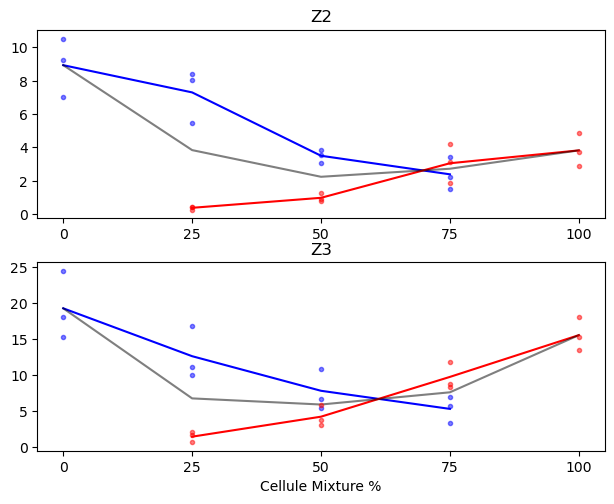

In [11]:
ticks = [0,25,50,75,100]
fig, axs = plt.subplots(2)
fig.tight_layout()

axs[0].plot(cmd20_mean_cultivar_apache['Trat'],cmd20_mean_cultivar_apache['Z2wm'], color = 'Blue')
axs[0].plot(cmd20_mean_cultivar_cellule['Trat'],cmd20_mean_cultivar_cellule['Z2wm'], color = 'Red')
axs[0].plot(cmd20_mean_trat['Trat'],cmd20_mean_trat['tZ2wm'], color ="Black", alpha = 0.5)
axs[0].plot(cmd20_mean_plot_apache['Trat'],cmd20_mean_plot_apache['pZ2wm'],'o',markersize = 3, color = "Blue", alpha = 0.5)
axs[0].plot(cmd20_mean_plot_cellule['Trat'],cmd20_mean_plot_cellule['pZ2wm'],'o',markersize = 3, color = "Red", alpha = 0.5)
axs[0].set_title("Z2")
axs[0].set_xticks(ticks)

axs[1].plot(cmd20_mean_cultivar_apache['Trat'],cmd20_mean_cultivar_apache['Z3wm'], color = 'Blue')
axs[1].plot(cmd20_mean_cultivar_cellule['Trat'],cmd20_mean_cultivar_cellule['Z3wm'], color = 'Red')
axs[1].plot(cmd20_mean_trat['Trat'],cmd20_mean_trat['tZ3wm'], color ="Black", alpha = 0.5)
axs[1].plot(cmd20_mean_plot_apache['Trat'],cmd20_mean_plot_apache['pZ3wm'],'o',markersize = 3, color = "Blue", alpha = 0.5)
axs[1].plot(cmd20_mean_plot_cellule['Trat'],cmd20_mean_plot_cellule['pZ3wm'],'o',markersize = 3, color = "Red", alpha = 0.5)
axs[1].set_title("Z3")
axs[1].set_xticks(ticks)
axs[1].set_xlabel("Cellule Mixture %")

In [14]:
#cmd_Z2Z3['Zm'] = cmd_Z2Z3.loc[:,('Z2','Z3')].mean(axis=1)
cmd20_mean_cultivar['Zm'] = cmd20_mean_cultivar.loc[:,('Z2wm','Z3wm')].mean(axis=1)

In [16]:
cmd20_mean_cultivar.drop('Cultivar', axis = 1 , inplace = True)

In [27]:
g = cmd20_mean_cultivar.groupby('Trat',as_index = False).mean()

Text(0.5, 0, 'Cellule Mixture %')

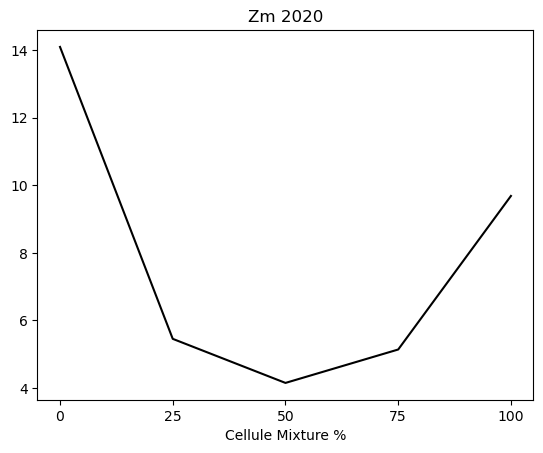

In [37]:
plt.plot(g['Trat'], g['Zm'], color = 'Black')
plt.title("Zm 2020")
plt.xticks(ticks)
plt.xlabel("Cellule Mixture %")


,Trat,Z2,Z3,w,Z2wm,Z3wm,Zm
0,0,8.933333,19.261905,1.0,8.933333,19.261905,14.097619
1,25,5.622222,11.411449,0.5,3.838889,7.064401,5.451645
2,50,4.477778,12.107517,0.5,2.238889,6.053759,4.146324
3,75,6.806061,17.191392,0.5,2.718182,7.553800,5.135991
4,100,3.822222,15.545455,1.0,3.822222,15.545455,9.683838
